# Section #1: Introduction

Hello visitors, this is my Capstone Project for Elite Data Science and the Accelerator Certification. In this project I will be exploring some of the mysteries of financial data, my first time working with it. 

What interests me with financial data is the aspect of the time stamp. Time stamps are a unique identifier marking when a certain event occurred, this is an attribute I have not worked with in Python. 

Challenges with this project were how to arrange the data, how to feature engineer from the data, creating additional useful information, and what to ask of the data.

The dataset I decided to use was stock prices from the Nasdaq’s and specifically Apple Inc. (AAPL). The link to the data is [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL/history?p=AAPL)

The pivotal question I will be asking the data is, does the close price for today have any correlation with the close price of yesterday and the opening price of today?

I've chosen to use autocorrelation and partial autocorrelation to explore the relationship between these three variables. 

Autocorrelation is a measure of correlation between a time series and a delayed copy of itself and can be used to find repetitive patterns or periodic signal in time series.

# Section #2: Library Imports

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

#Import autocorrelation and plot

from statsmodels.graphics.tsaplots import plot_acf

#Import patial correlation and plot

from statsmodels.graphics.tsaplots import plot_pacf

## Load the data

In [2]:
df = pd.read_csv('../datasets/AAPL.csv')


# Section #3: Exploratory Analysis

## Basic Information

7 Columns, 503 rows 

In [3]:
df.shape


(503, 7)

First five rows of data set.

In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-01,62.384998,63.982498,62.290001,63.955002,62.830284,151125200
1,2019-11-04,64.332497,64.462502,63.845001,64.375000,63.242901,103272000
2,2019-11-05,64.262497,64.547501,64.080002,64.282501,63.152016,79897600
3,2019-11-06,64.192497,64.372498,63.842499,64.309998,63.179031,75864400
4,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.908195,94940400


Last five rows of data set.

In [5]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
498,2021-10-25,148.679993,149.369995,147.619995,148.639999,148.423386,50720600
499,2021-10-26,149.330002,150.839996,149.009995,149.320007,149.102402,60893400
500,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.633087,56094900
501,2021-10-28,149.820007,153.169998,149.720001,152.570007,152.347656,100077900
502,2021-10-29,147.220001,149.940002,146.410004,149.800003,149.581696,124850400


Only data type not conducive to python is Date "Object". Other data types are all "64" which is integer base.

In [6]:
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Returns a Pandas Series for better integration into models.

In [7]:
type(df.dtypes)


pandas.core.series.Series

# Section #4: Data Cleaning

## Convert "Date" column from object to datetime64

Why? Because Python doesn't work well with strings.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the "Date" column as the index

Why? Because that's how the analyst will track a data point across the data frame.

In [9]:
df.set_index('Date', inplace=True)

df.sort_index(inplace=True)


First five rows of data set.

In [10]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,62.384998,63.982498,62.290001,63.955002,62.830284,151125200
2019-11-04,64.332497,64.462502,63.845001,64.375000,63.242901,103272000
2019-11-05,64.262497,64.547501,64.080002,64.282501,63.152016,79897600
2019-11-06,64.192497,64.372498,63.842499,64.309998,63.179031,75864400
2019-11-07,64.684998,65.087502,64.527496,64.857498,63.908195,94940400


Last five rows of data set.

In [11]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,148.679993,149.369995,147.619995,148.639999,148.423386,50720600
2021-10-26,149.330002,150.839996,149.009995,149.320007,149.102402,60893400
2021-10-27,149.360001,149.729996,148.490005,148.850006,148.633087,56094900
2021-10-28,149.820007,153.169998,149.720001,152.570007,152.347656,100077900
2021-10-29,147.220001,149.940002,146.410004,149.800003,149.581696,124850400


# Section #5: Feature Engineering & Analysis

## Column data explanation 
- "Close" : The price of AAPL when the stock market closes (at 4:30pm ET)
- "Adj Close" : The closing price, when accounting for dividend payments, stock splits, etc.
- "High" : The highest price of AAPL during that trading day
- "Low" : The lowest price of AAPL during that trading day
- "Open" : The price of AAPL when the stock market opens (at 9:30am ET)
- "Volume" : How many shares of AAPL were traded that day

Sets data frame to see all rows.

In [12]:
pd.set_option("max_rows", None)


## Filtering the "Date" column

### By year:

In [13]:
df['2020']


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269157,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505646,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.688087,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,76.274506,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,76.446953,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,78.080185,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,77.025848,161954400


### By month:

In [14]:
df['2021-03']


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.196815,116307900
2021-03-02,128.410004,128.720001,125.010002,125.120003,124.539215,102260900
2021-03-03,124.809998,125.709999,121.839996,122.059998,121.493416,112966300
2021-03-04,121.750000,123.599998,118.620003,120.129997,119.572372,178155000
2021-03-05,120.980003,121.940002,117.570000,121.419998,120.856384,153766600
2021-03-08,120.930000,121.000000,116.209999,116.360001,115.819870,154376600
2021-03-09,119.029999,122.059998,118.790001,121.089996,120.527916,129525800
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.423073,111943300
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.393875,103026500


## Data investigation: Mean our data by the month

In [15]:
df.resample('M').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-30,65.423499,65.865375,65.060500,65.630126,64.631632,8.966630e+07
2019-12-31,68.847857,69.470952,68.467024,69.131428,68.119575,1.137521e+08
2020-01-31,77.792738,78.581547,77.207857,77.979048,76.837695,1.397319e+08
2020-02-29,77.578421,78.813158,76.681579,77.817631,76.821416,1.589094e+08
2020-03-31,65.268410,67.423181,63.711591,65.611023,64.804132,2.854578e+08
2020-04-30,67.952857,68.945357,67.021072,68.096547,67.259091,1.554904e+08
2020-05-31,77.221375,78.312875,76.595250,77.496376,76.700919,1.402968e+08
2020-06-30,86.135341,87.336250,85.160681,86.451590,85.619544,1.474262e+08
2020-07-31,95.417500,96.586818,94.265682,95.566250,94.646482,1.372856e+08


## Data investigation: Mean our data for a month

In [16]:
df['2021-04'].mean()


Open         1.316724e+02
High         1.329114e+02
Low          1.304652e+02
Close        1.318129e+02
Adj Close    1.312010e+02
Volume       8.999321e+07
dtype: float64

## Using a "rolling" function (moving average)

Why? Because it gives us a mean as time passes, in this case for the first 5 instances of the dataset.

In [17]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,62.384998,63.982498,62.290001,63.955002,62.830284,151125200
2019-11-04,64.332497,64.462502,63.845001,64.375000,63.242901,103272000
2019-11-05,64.262497,64.547501,64.080002,64.282501,63.152016,79897600
2019-11-06,64.192497,64.372498,63.842499,64.309998,63.179031,75864400
2019-11-07,64.684998,65.087502,64.527496,64.857498,63.908195,94940400


This is the "rolling" average for the first five rows.

In [18]:
df.rolling(2).mean().head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,63.358747,64.222500,63.067501,64.165001,63.036592,127198600.0
2019-11-05,64.297497,64.505002,63.962502,64.328750,63.197458,91584800.0
2019-11-06,64.227497,64.459999,63.961251,64.296249,63.165523,77881000.0
2019-11-07,64.438748,64.730000,64.184997,64.583748,63.543613,85402400.0


## Plotting a rolling average with data

Why? Rolling averages smooth out the period-to-period price fluctuations and helps to highlight the overall trend direction.

Example Below: The rolling average for open (price) for 30 days overlaid with a graph of the open (price) daily.

/Users/adhudz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


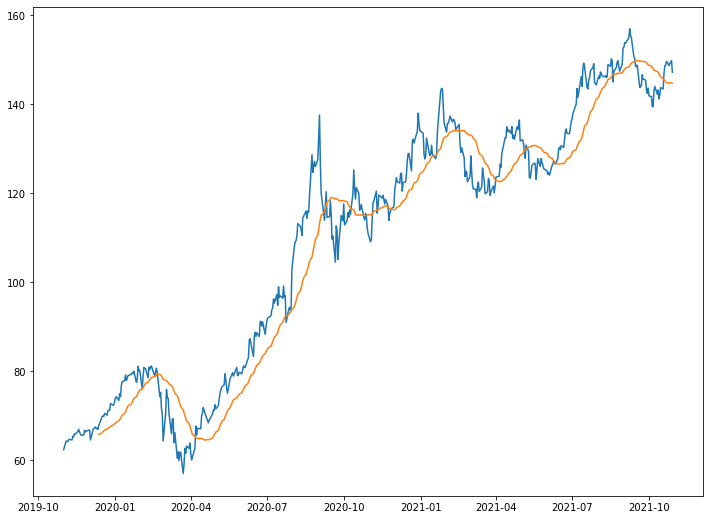

In [19]:
plt.figure(figsize=(12,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())


## Extracting "rolling" average data for 30 days

In [20]:
pd.concat([
    df[['Open']],
    df[['Open']].rolling(30).mean().rename(columns={'Open': 'Open 30 Day Avg'})
], axis=1).head(502)


,Open,Open 30 Day Avg
Date,,
2019-11-01,62.384998,NaN
2019-11-04,64.332497,NaN
2019-11-05,64.262497,NaN
2019-11-06,64.192497,NaN
2019-11-07,64.684998,NaN
2019-11-08,64.672501,NaN
2019-11-11,64.574997,NaN
2019-11-12,65.387497,NaN
2019-11-13,65.282501,NaN


## Using a "difference" function (differences in a value between a value)

This is the "rolling" average for the first five rows.

In [21]:
df.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,1.947499,0.480004,1.555000,0.419998,0.412617,-47853200.0
2019-11-05,-0.070000,0.084999,0.235001,-0.092499,-0.090885,-23374400.0
2019-11-06,-0.070000,-0.175003,-0.237503,0.027497,0.027015,-4033200.0
2019-11-07,0.492501,0.715004,0.684997,0.547500,0.729164,19076000.0


## Using a "percent" function (differences as a change in percentage)

This is the "Percent" average for the first five rows.

In [22]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,0.031217,0.007502,0.024964,0.006567,0.006567,-0.316646
2019-11-05,-0.001088,0.001319,0.003681,-0.001437,-0.001437,-0.226338
2019-11-06,-0.001089,-0.002711,-0.003706,0.000428,0.000428,-0.050480
2019-11-07,0.007672,0.011107,0.010729,0.008513,0.011541,0.251449


## Plotting "Close" price, "difference" in close price, and "percent" in close price

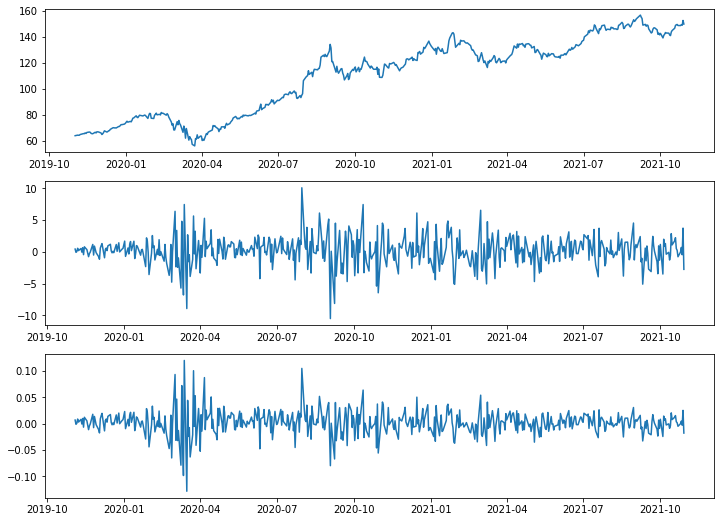

In [23]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))
axes[0].plot(df.Close)
axes[1].plot(df.Close.diff())
axes[2].plot(df.Close.pct_change())

Generally speaking, it appears the area with greatest variability was from 2020-1 to 2020-7. 

This was the time encompassing the COVID pandemic lockdown.

Although there is variability is post months from then, it appears that variability is receding.

## Plotting Volatility using the standard deviation of the returns of "percent" change in a "rolling" ten day average

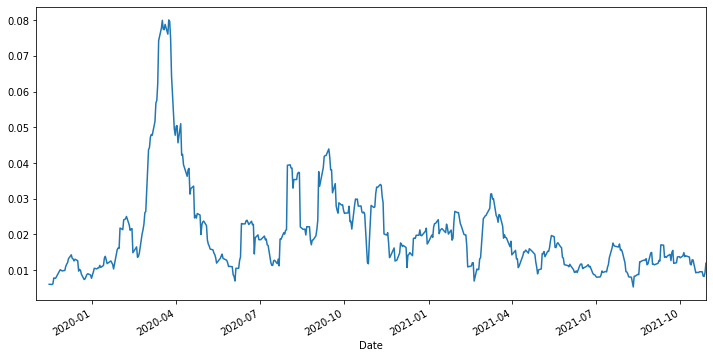

In [24]:
plt.figure(figsize=(12,6))
df.Close.pct_change().rolling(10).std().plot()

This graph generally shows the same results as previously shown.

Volatility was up from 2020-1 to 2020-7.

Volatility is receding.


# Section #7: Model Training

## Using a "shift" function to bring values from previous dates forward in time.

Why? This is a test for the delayed version of the open (price) that will have to be manipulated to fit into the autocorrelation and partial correlation.

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,62.384998,63.982498,62.290001,63.955002,62.830284,151125200
2019-11-04,64.332497,64.462502,63.845001,64.375000,63.242901,103272000
2019-11-05,64.262497,64.547501,64.080002,64.282501,63.152016,79897600
2019-11-06,64.192497,64.372498,63.842499,64.309998,63.179031,75864400
2019-11-07,64.684998,65.087502,64.527496,64.857498,63.908195,94940400


In [26]:
df.shift().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,62.384998,63.982498,62.290001,63.955002,62.830284,151125200.0
2019-11-05,64.332497,64.462502,63.845001,64.375000,63.242901,103272000.0
2019-11-06,64.262497,64.547501,64.080002,64.282501,63.152016,79897600.0
2019-11-07,64.192497,64.372498,63.842499,64.309998,63.179031,75864400.0


## Creating a Dataset

### Creation of data set for the purpose of exploring the relationship between today's "Close" price using yesterday's "Close" with today's "Open" price.

In [27]:
pd.concat([
    df[['Close']].rename(columns={'Close': 'y'}),
    df[['Close']].shift().rename(columns={'Close': 'prev_close'}),
    df[['Open']].rename(columns={'Open': 'open'})
], axis=1).head()


,y,prev_close,open
Date,,,
2019-11-01,63.955002,NaN,62.384998
2019-11-04,64.375000,63.955002,64.332497
2019-11-05,64.282501,64.375000,64.262497
2019-11-06,64.309998,64.282501,64.192497
2019-11-07,64.857498,64.309998,64.684998


### Evoking autocorrelation and plot

"lags=502" encompasses the entire data set

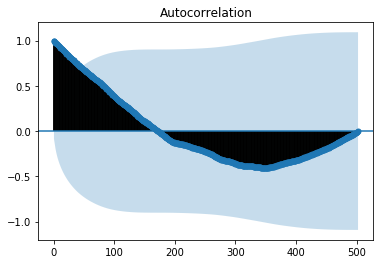

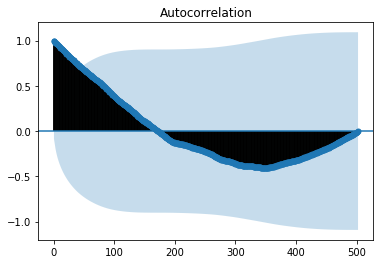

In [28]:
plot_acf(df.Close, lags=502)

"lags=331" encompasses 2/3 of the data set

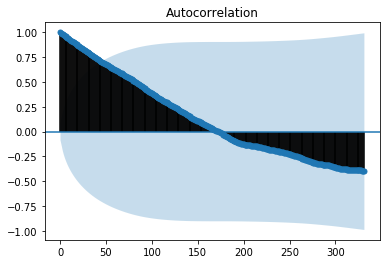

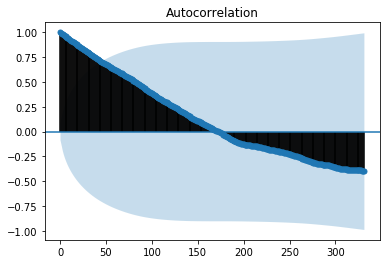

In [29]:
plot_acf(df.Close, lags=331)

"lags=165" encompasses the 1/3 of the data set

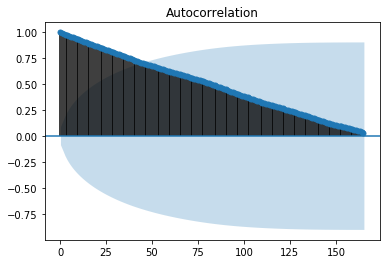

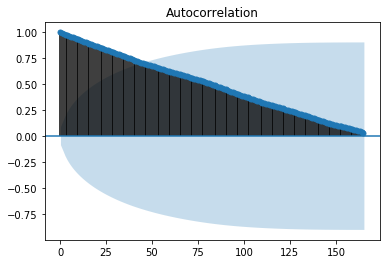

In [30]:
plot_acf(df.Close, lags=165)

# Section #8.1: Insights

An autocorrelation of zero indicates no correlation. One and negative one indicates strong positive and negative correlation. Margins of uncertainty are indicated by blue regions, while areas outside the blue region indicate strong areas of correlation.

Shown in the graphs above, only close (price) that has been trending upward for a signification amount of time has strong correlation.


[DataCamp](https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/seasonality-trend-and-noise?ex=1)

### Evoking patial correlation and plot

"lags=502" encompasses the entire data set

/Users/adhudz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


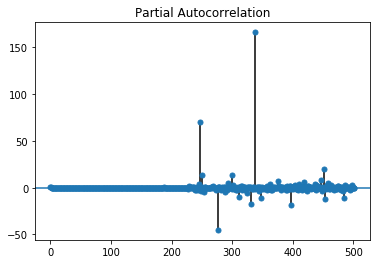

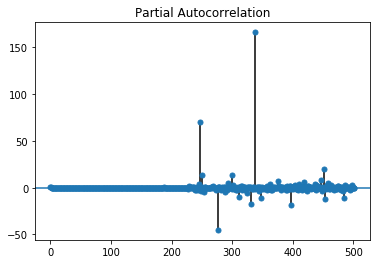

In [31]:
plot_pacf(df.Close, lags=502)

"lags=311" encompasses 2/3 of the data set

/Users/adhudz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


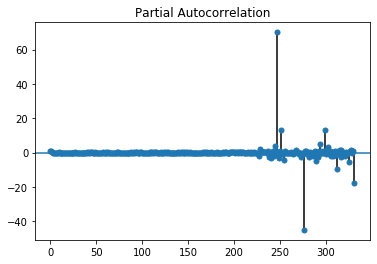

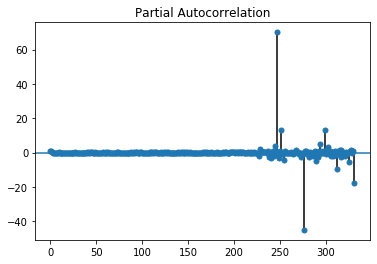

In [32]:
plot_pacf(df.Close, lags=331)

"lags=165" encompasses 1/3 of the data set

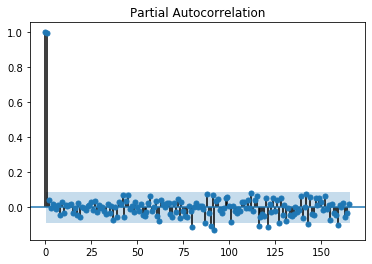

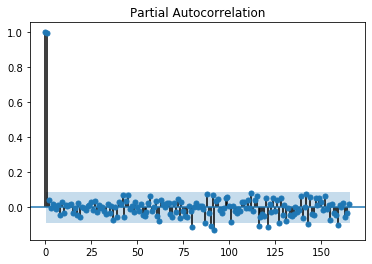

In [33]:
plot_pacf(df.Close, lags=165)

# Section #8.2: Insights

Partial autocorrelation removes the effect of previous time points. One and negative one indicates strong positive and negative correlation. Margins of uncertainty are indicated by blue regions, while areas outside the blue region indicate strong areas of correlation.

Shown in the graphs above, only close (price) over a short amount of time has a signification amount of uncertainty.


[DataCamp](https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/seasonality-trend-and-noise?ex=1)

### Using a "Autocorrelation" function and the "shift" function to find correlation between close (price) for today from the close (price) or yestterday and open (price) of today### Using an "Autocorrelation" function and the "shift" function to find correlation between close (price) for today from the close (price) or yesterday and open (price) of today!

Deriving a co-efficient from the close (price)

In [34]:
np.corrcoef(df.Close[500:], df.Close.shift()[500:])

array([[ 1.        , -0.38163518],
       [-0.38163518,  1.        ]])

In [35]:
np.corrcoef(df.Close[330:], df.Close.shift()[330:])

array([[1.        , 0.98295394],
       [0.98295394, 1.        ]])

In [36]:
np.corrcoef(df.Close[165:], df.Close.shift()[165:])

array([[1.        , 0.98688108],
       [0.98688108, 1.        ]])

# Section #8.3: Insights

When a series has a positive number, it's trend is following, or attempts to capture gains through the analysis of an asset's momentum in a particular direction.

Given these facts, the first coefficient which takes into effect the entire data set, -0.38, including the most volatile time, leads to instability, and a reverting to average price.

The second coefficient, +0.982, is trending in a positive direction closer to the average, give 2/3 of the data set.

The las t coefficient, =0.986, is reinforcing the stabilizing positive trend found in the earliest 1/3 of the data set.


[YouTube](https://youtu.be/O7Jr6z_oUJ8)

# Section #9: Insights & Analysis

### Overal View:

Looking at the entire dataset of Apple stock between November 2019 to November 2021 the overall price has gone up. 

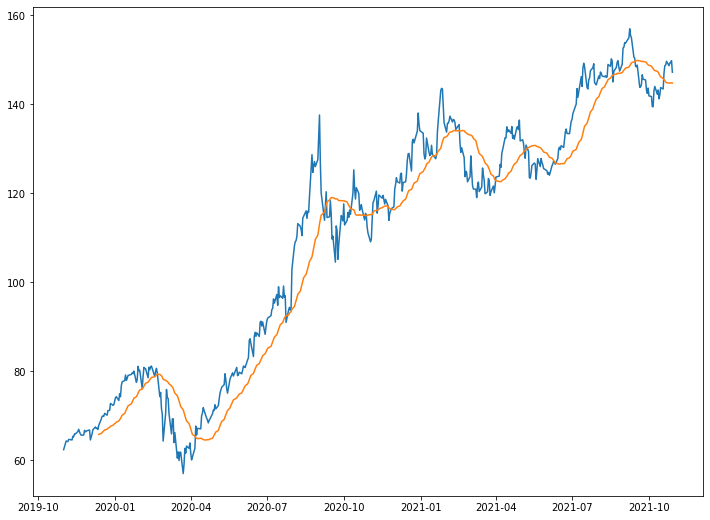

However, there has been volityilty during this time.

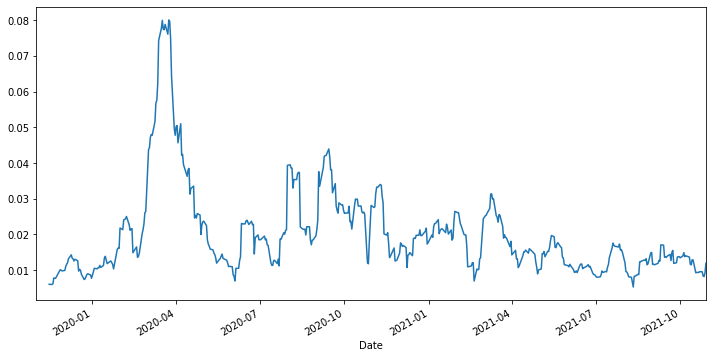

The most volity time for the stock is between January 2020 and July 2020. This can be attributed to the outbreak of the Covid Pandemic. Inside this time, April 2020 was the most volitile, correlated to the Covid Lockdown.

### The Question:

At the beginning of this project, I asked the question, does the close price for today have any correlation with the close price of yesterday and the opening price of today?

The evidence leads me to yes it does, with certain conditions.

These conditions are as follows,

    1) The timeframe analyzed is stable, meaning the close price (today), opening price (today) and closing price (yesterday) is consistent. 

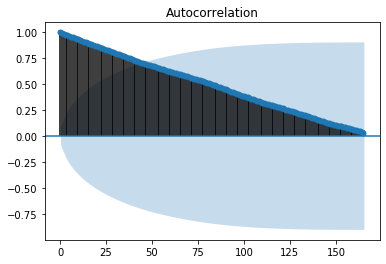

The chart above shows the last third of the data set, February 2021 to November 2021. This represents the most stable part of the data set, also the highest autocorrelation coefficient at 0.986.

Only part of the price is certainly, not shaded blue. This timeframe in uncertainty would be key to defining, hence knowing when the "green" for optimal certainty is.

    2) The timeframe analyzed is not volatile.

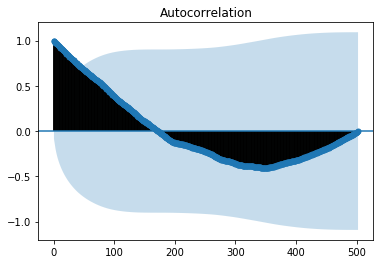

The chart above shows the entire data set. This represents how volatility the apple close price (today), opening price (today) and closing price (yesterday) has been. 

### Expansion:

An expansion of this project would be to build an "alarm" which would indicate when certainty is greatest.

### Takeaways

Dealing with the timestamp was both challenging and intriguing. Thinking about how to run other models with or without it would be another interesting project.